map filenames to species and create a structured dataset

In [1]:
import pandas as pd

# Load CSV
csv_path = r"E:\MIniproject sem 6\xeno canto dataset\all\train_extended_merged.csv"
df = pd.read_csv(csv_path)

# Display first few rows
print(df[['filename', 'species']].head())


       filename           species
0  XC554809.mp3  Alder Flycatcher
1  XC552408.mp3  Alder Flycatcher
2  XC544552.mp3  Alder Flycatcher
3  XC544551.mp3  Alder Flycatcher
4  XC544550.mp3  Alder Flycatcher


In [2]:
!pip install librosa pandas numpy matplotlib seaborn tensorflow


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Preprocessing the audio data
ffmpeg - software suite consisting of libraries and tools for handling multimedia files, including video, audio, and images,

In [4]:
import os
from pydub import AudioSegment

# Define the path to your dataset
dataset_path = r"E:\MIniproject sem 6\xeno canto dataset\all\A-Z"

# Loop through all bird class folders
for bird_class in os.listdir(dataset_path):
    bird_folder = os.path.join(dataset_path, bird_class)
    
    if os.path.isdir(bird_folder):  # Check if it's a folder
        print(f"\nProcessing bird class: {bird_class}")

        # Loop through all files in the folder
        for file in os.listdir(bird_folder):
            if file.endswith(".mp4"):  # Only process MP4 files
                mp4_path = os.path.join(bird_folder, file)
                wav_path = os.path.join(bird_folder, file.replace(".mp4", ".wav"))

                try:
                    # Convert MP4 to WAV
                    audio = AudioSegment.from_file(mp4_path, format="mp4")
                    audio.export(wav_path, format="wav")
                    print(f"Converted: {file} → {wav_path}")

                except Exception as e:
                    print(f"Error converting {file}: {e}")



Processing bird class: aldfly

Processing bird class: ameavo

Processing bird class: amebit

Processing bird class: amecro

Processing bird class: amegfi

Processing bird class: amekes

Processing bird class: amepip

Processing bird class: amered

Processing bird class: amerob

Processing bird class: amewig

Processing bird class: amewoo

Processing bird class: amtspa

Processing bird class: annhum

Processing bird class: astfly

Processing bird class: baisan

Processing bird class: baleag

Processing bird class: balori

Processing bird class: banswa

Processing bird class: barswa

Processing bird class: bawwar

Processing bird class: belkin1

Processing bird class: belspa2

Processing bird class: bewwre

Processing bird class: bkbcuc

Processing bird class: bkbmag1

Processing bird class: bkbwar

Processing bird class: bkcchi

Processing bird class: bkchum

Processing bird class: bkhgro

Processing bird class: bkpwar

Processing bird class: bktspa

Processing bird class: blkpho

Proc

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress tracking


Extracting features from wav files and prepare the data for training 

In [2]:
# Path where all WAV files are stored
dataset_path = r"E:\MIniproject sem 6\xeno canto dataset\all\A-Z"

# Path to save extracted spectrogram features
output_path = r"E:\MIniproject sem 6\xeno canto dataset\features"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)


In [3]:
def extract_mel_spectrogram(file_path, save_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Generate the Mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Save the spectrogram as a .npy file
        np.save(save_path, mel_spectrogram_db)
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


In [4]:
# Get all bird species folders (each folder is a bird class)
bird_classes = os.listdir(dataset_path)

for bird_class in bird_classes:
    bird_folder = os.path.join(dataset_path, bird_class)

    # Skip if it's not a folder
    if not os.path.isdir(bird_folder):
        continue

    print(f"Processing bird class: {bird_class}")

    # Create a folder for this bird class in the output directory
    bird_output_folder = os.path.join(output_path, bird_class)
    os.makedirs(bird_output_folder, exist_ok=True)

    # Process each WAV file
    for file_name in tqdm(os.listdir(bird_folder)):
        if file_name.endswith(".wav"):  # Ensure it's a WAV file
            input_file = os.path.join(bird_folder, file_name)
            output_file = os.path.join(bird_output_folder, file_name.replace(".wav", ".npy"))
            extract_mel_spectrogram(input_file, output_file)


Processing bird class: aldfly


100%|████████████████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<?, ?it/s]


Processing bird class: ameavo


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Processing bird class: amebit


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]

Processing bird class: amecro

100%|████████████████████████████████████████████████████████████████████████████████████████| 147/147 [00:00<?, ?it/s]


Processing bird class: amegfi


100%|██████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<?, ?it/s]


Processing bird class: amekes


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: amepip


100%|██████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<?, ?it/s]


Processing bird class: amered


100%|████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:00<?, ?it/s]


Processing bird class: amerob


100%|████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<00:00, 805227.23it/s]


Processing bird class: amewig


100%|██████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Processing bird class: amewoo


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: amtspa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Processing bird class: annhum


100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


Processing bird class: astfly


100%|████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<?, ?it/s]


Processing bird class: baisan


100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Processing bird class: baleag


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 4468.65it/s]

Processing bird class: balori



100%|██████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<?, ?it/s]


Processing bird class: banswa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]

Processing bird class: barswa



100%|████████████████████████████████████████████████████████████████████████████████████████| 608/608 [00:00<?, ?it/s]


Processing bird class: bawwar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<?, ?it/s]


Processing bird class: belkin1


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: belspa2


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: bewwre


100%|████████████████████████████████████████████████████████████████████████████████████████| 363/363 [00:00<?, ?it/s]


Processing bird class: bkbcuc


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Processing bird class: bkbmag1


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Processing bird class: bkbwar


100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 15136.14it/s]


Processing bird class: bkcchi


100%|████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<?, ?it/s]


Processing bird class: bkchum


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Processing bird class: bkhgro


100%|████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<?, ?it/s]


Processing bird class: bkpwar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<?, ?it/s]


Processing bird class: bktspa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Processing bird class: blkpho


100%|██████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]


Processing bird class: blugrb1


100%|██████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 100028.63it/s]


Processing bird class: blujay


100%|████████████████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<?, ?it/s]


Processing bird class: bnhcow


100%|████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<?, ?it/s]


Processing bird class: boboli


100%|██████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<?, ?it/s]


Processing bird class: bongul


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Processing bird class: brdowl


100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


Processing bird class: brebla


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Processing bird class: brespa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


Processing bird class: brncre


100%|████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<?, ?it/s]


Processing bird class: brnthr


100%|██████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]


Processing bird class: brthum


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

Processing bird class: brwhaw



100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: btbwar


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: btnwar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Processing bird class: btywar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Processing bird class: buffle


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Processing bird class: buggna

100%|████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<?, ?it/s]


Processing bird class: buhvir


100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 5218.96it/s]


Processing bird class: bulori


100%|████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<?, ?it/s]


Processing bird class: bushti


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<?, ?it/s]


Processing bird class: buwwar


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Processing bird class: cacwre


100%|██████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<?, ?it/s]


Processing bird class: calgul


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1985.70it/s]


Processing bird class: calqua


100%|██████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<?, ?it/s]


Processing bird class: camwar


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

Processing bird class: cangoo



100%|████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<?, ?it/s]


Processing bird class: canwar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<?, ?it/s]


Processing bird class: canwre


100%|██████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<?, ?it/s]


Processing bird class: carwre


100%|████████████████████████████████████████████████████████████████████████████| 371/371 [00:00<00:00, 183891.13it/s]


Processing bird class: casfin


100%|██████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]


Processing bird class: caster1


100%|██████████████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<?, ?it/s]


Processing bird class: casvir


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


Processing bird class: cedwax


100%|████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Processing bird class: chispa


100%|████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<?, ?it/s]


Processing bird class: chiswi


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Processing bird class: chswar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


Processing bird class: chukar


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Processing bird class: clanut


100%|██████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<?, ?it/s]


Processing bird class: cliswa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<?, ?it/s]


Processing bird class: comgol


100%|██████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]


Processing bird class: comgra


100%|██████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<?, ?it/s]


Processing bird class: comloo


100%|██████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<?, ?it/s]


Processing bird class: commer


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]

Processing bird class: comnig



100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: comrav


100%|████████████████████████████████████████████████████████████████████████████████████████| 889/889 [00:00<?, ?it/s]


Processing bird class: comred


100%|████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<?, ?it/s]


Processing bird class: comter


100%|████████████████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<?, ?it/s]


Processing bird class: comyel


100%|█████████████████████████████████████████████████████████████████████████████| 307/307 [00:00<00:00, 37049.38it/s]


Processing bird class: coohaw


100%|███████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 52501.72it/s]


Processing bird class: coshum


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Processing bird class: cowscj1


100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Processing bird class: daejun


100%|████████████████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<?, ?it/s]

Processing bird class: dowwoo



100%|██████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<?, ?it/s]


Processing bird class: dusfly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Processing bird class: eargre


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Processing bird class: easblu


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Processing bird class: easkin


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Processing bird class: easmea


100%|████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<?, ?it/s]


Processing bird class: easpho


100%|██████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]

Processing bird class: eastow



100%|████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<?, ?it/s]


Processing bird class: eawpew


100%|██████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<?, ?it/s]


Processing bird class: eucdov


100%|████████████████████████████████████████████████████████████████████████████████████████| 318/318 [00:00<?, ?it/s]


Processing bird class: eursta


100%|████████████████████████████████████████████████████████████████████████████████████████| 694/694 [00:00<?, ?it/s]


Processing bird class: evegro


100%|██████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<?, ?it/s]


Processing bird class: fiespa


100%|███████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 22516.54it/s]


Processing bird class: fiscro


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: foxspa


100%|███████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 99604.49it/s]


Processing bird class: gadwal


100%|████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 8031.48it/s]


Processing bird class: gnttow


100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<?, ?it/s]


Processing bird class: gnwtea


100%|████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<?, ?it/s]


Processing bird class: gockin


100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 10301.28it/s]


Processing bird class: gocspa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Processing bird class: goleag


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Processing bird class: grbher3


100%|██████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<?, ?it/s]


Processing bird class: grcfly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<?, ?it/s]


Processing bird class: greegr


100%|██████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 143776.38it/s]


Processing bird class: greroa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Processing bird class: greyel


100%|██████████████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<?, ?it/s]


Processing bird class: grhowl


100%|████████████████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<?, ?it/s]


Processing bird class: grnher


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Processing bird class: grtgra


100%|█████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 12960.94it/s]


Processing bird class: grycat


100%|████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<?, ?it/s]


Processing bird class: gryfly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Processing bird class: haiwoo


100%|██████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<?, ?it/s]


Processing bird class: hamfly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Processing bird class: hergul


100%|██████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


Processing bird class: herthr


100%|████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<?, ?it/s]

Processing bird class: hoomer



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Processing bird class: hoowar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<?, ?it/s]


Processing bird class: horlar


100%|█████████████████████████████████████████████████████████████████████████████| 145/145 [00:00<00:00, 71474.21it/s]


Processing bird class: houfin


100%|████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<?, ?it/s]


Processing bird class: houspa


100%|██████████████████████████████████████████████████████████████████████████████████████| 1216/1216 [00:00<?, ?it/s]


Processing bird class: houwre


100%|████████████████████████████████████████████████████████████████████████████████████████| 984/984 [00:00<?, ?it/s]


Processing bird class: indbun


100%|████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<?, ?it/s]


Processing bird class: juntit1


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]

Processing bird class: killde



100%|██████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<?, ?it/s]


Processing bird class: labwoo


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Processing bird class: larspa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Processing bird class: lazbun


100%|██████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<?, ?it/s]

Processing bird class: leabit



100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Processing bird class: leafly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<?, ?it/s]


Processing bird class: leasan


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: lecthr


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

Processing bird class: lesgol



100%|████████████████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<?, ?it/s]

Processing bird class: lesnig



100%|████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 8918.78it/s]


Processing bird class: lesyel


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


Processing bird class: lewwoo


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Processing bird class: linspa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<?, ?it/s]


Processing bird class: lobcur


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Processing bird class: lobdow


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Processing bird class: logshr


100%|██████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<?, ?it/s]


Processing bird class: lotduc


100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Processing bird class: louwat


100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]

Processing bird class: macwar

100%|██████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<?, ?it/s]


Processing bird class: magwar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<?, ?it/s]


Processing bird class: mallar3


100%|████████████████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<?, ?it/s]


Processing bird class: marwre


100%|████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<?, ?it/s]


Processing bird class: merlin


100%|████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Processing bird class: moublu


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Processing bird class: mouchi


100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


Processing bird class: moudov


100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


Processing bird class: norcar


100%|████████████████████████████████████████████████████████████████████████████████████████| 456/456 [00:00<?, ?it/s]

Processing bird class: norfli



100%|████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 116800.98it/s]


Processing bird class: norhar2


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Processing bird class: normoc


100%|████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<?, ?it/s]


Processing bird class: norpar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<?, ?it/s]


Processing bird class: norpin


100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<?, ?it/s]


Processing bird class: norsho


100%|██████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Processing bird class: norwat


100%|████████████████████████████████████████████████████████████████████████████████████████| 135/135 [00:00<?, ?it/s]


Processing bird class: nrwswa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: nutwoo


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: olsfly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]

Processing bird class: orcwar



100%|█████████████████████████████████████████████████████████████████████████████| 116/116 [00:00<00:00, 93493.33it/s]


Processing bird class: osprey


100%|████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<?, ?it/s]


Processing bird class: ovenbi1


100%|██████████████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<?, ?it/s]


Processing bird class: palwar


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Processing bird class: pasfly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<?, ?it/s]


Processing bird class: pecsan


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Processing bird class: perfal


100%|██████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<?, ?it/s]


Processing bird class: phaino


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Processing bird class: pibgre


100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]


Processing bird class: pilwoo


100%|██████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<?, ?it/s]


Processing bird class: pingro


100%|██████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<?, ?it/s]


Processing bird class: pinjay


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 4385.82it/s]


Processing bird class: pinsis


100%|██████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]

Processing bird class: pinwar



100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Processing bird class: plsvir


100%|██████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<?, ?it/s]

Processing bird class: prawar



100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Processing bird class: purfin


100%|██████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


Processing bird class: pygnut


100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Processing bird class: rebmer


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Processing bird class: rebnut


100%|██████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<?, ?it/s]


Processing bird class: rebsap


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

Processing bird class: rebwoo



100%|██████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<?, ?it/s]


Processing bird class: redcro


100%|██████████████████████████████████████████████████████████████████████████████████████| 1772/1772 [00:00<?, ?it/s]


Processing bird class: reevir1


100%|███████████████████████████████████████████████████████████████████████████████| 97/97 [00:00<00:00, 36986.14it/s]


Processing bird class: renpha


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Processing bird class: reshaw


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


Processing bird class: rethaw


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: rewbla


100%|████████████████████████████████████████████████████████████████████████████| 466/466 [00:00<00:00, 131054.42it/s]


Processing bird class: ribgul


100%|████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Processing bird class: rinduc


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Processing bird class: robgro


100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


Processing bird class: rocpig


100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


Processing bird class: rocwre


100%|██████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Processing bird class: rthhum


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Processing bird class: ruckin


100%|████████████████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<?, ?it/s]


Processing bird class: rudduc


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Processing bird class: rufgro


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 574.64it/s]


Processing bird class: rufhum


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: rusbla


100%|████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 1736.31it/s]

Processing bird class: sagspa1



100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Processing bird class: sagthr


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: savspa


100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 63597.07it/s]


Processing bird class: saypho


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Processing bird class: scatan


100%|██████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]

Processing bird class: scoori



100%|██████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<?, ?it/s]


Processing bird class: semplo


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Processing bird class: semsan


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Processing bird class: sheowl


100%|██████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


Processing bird class: shshaw


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Processing bird class: snobun


100%|██████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<?, ?it/s]


Processing bird class: snogoo


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: solsan


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Processing bird class: sonspa


100%|████████████████████████████████████████████████████████████████████████████| 621/621 [00:00<00:00, 309122.10it/s]


Processing bird class: sora


100%|███████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 21100.10it/s]


Processing bird class: sposan


100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Processing bird class: spotow


100%|████████████████████████████████████████████████████████████████████████████| 409/409 [00:00<00:00, 782605.08it/s]


Processing bird class: stejay


100%|██████████████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<?, ?it/s]

Processing bird class: swahaw



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Processing bird class: swaspa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<?, ?it/s]


Processing bird class: swathr


100%|████████████████████████████████████████████████████████████████████████████████████████| 379/379 [00:00<?, ?it/s]


Processing bird class: treswa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Processing bird class: truswa


100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Processing bird class: tuftit


100%|█████████████████████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 86574.44it/s]


Processing bird class: tunswa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Processing bird class: veery


100%|██████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<?, ?it/s]

Processing bird class: vesspa

100%|██████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<?, ?it/s]


Processing bird class: vigswa


100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Processing bird class: warvir


100%|████████████████████████████████████████████████████████████████████████████████████████| 306/306 [00:00<?, ?it/s]

Processing bird class: wesblu



100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1163.93it/s]


Processing bird class: wesgre


100%|██████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<?, ?it/s]


Processing bird class: weskin


100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Processing bird class: wesmea


100%|█████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 45513.62it/s]


Processing bird class: wessan


100%|█████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15051.33it/s]


Processing bird class: westan


100%|██████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<?, ?it/s]

Processing bird class: wewpew



100%|████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 124478.84it/s]


Processing bird class: whbnut


100%|████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<?, ?it/s]


Processing bird class: whcspa


100%|█████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 66422.08it/s]


Processing bird class: whfibi


100%|████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Processing bird class: whtspa


100%|████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<?, ?it/s]


Processing bird class: whtswi


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Processing bird class: wilfly


100%|████████████████████████████████████████████████████████████████████████████████████████| 116/116 [00:00<?, ?it/s]


Processing bird class: wilsni1


100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


Processing bird class: wiltur


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]

Processing bird class: winwre3



100%|████████████████████████████████████████████████████████████████████████████████████████| 109/109 [00:00<?, ?it/s]


Processing bird class: wlswar


100%|████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:00<?, ?it/s]


Processing bird class: wooduc


100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Processing bird class: wooscj2


100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 5480.96it/s]

Processing bird class: woothr



100%|█████████████████████████████████████████████████████████████████████████████| 134/134 [00:00<00:00, 66702.67it/s]


Processing bird class: y00475


100%|██████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<?, ?it/s]


Processing bird class: yebfly


100%|██████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Processing bird class: yebsap


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Processing bird class: yehbla


100%|████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 3840.23it/s]


Processing bird class: yelwar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<?, ?it/s]


Processing bird class: yerwar


100%|██████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<?, ?it/s]


Processing bird class: yetvir


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 11820.49it/s]


In [5]:
# Load a sample spectrogram and display it
sample_file = np.load(os.path.join(output_path, bird_classes[0], os.listdir(os.path.join(output_path, bird_classes[0]))[0]))

plt.figure(figsize=(10, 4))
librosa.display.specshow(sample_file, sr=22050, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of a Bird Sound")
plt.show()


IndexError: list index out of range

In [6]:
print("Bird Classes Found:", os.listdir(output_path))


Bird Classes Found: ['aldfly', 'ameavo', 'amebit', 'amecro', 'amegfi', 'amekes', 'amepip', 'amered', 'amerob', 'amewig', 'amewoo', 'amtspa', 'annhum', 'astfly', 'baisan', 'baleag', 'balori', 'banswa', 'barswa', 'bawwar', 'belkin1', 'belspa2', 'bewwre', 'bkbcuc', 'bkbmag1', 'bkbwar', 'bkcchi', 'bkchum', 'bkhgro', 'bkpwar', 'bktspa', 'blkpho', 'blugrb1', 'blujay', 'bnhcow', 'boboli', 'bongul', 'brdowl', 'brebla', 'brespa', 'brncre', 'brnthr', 'brthum', 'brwhaw', 'btbwar', 'btnwar', 'btywar', 'buffle', 'buggna', 'buhvir', 'bulori', 'bushti', 'buwwar', 'cacwre', 'calgul', 'calqua', 'camwar', 'cangoo', 'canwar', 'canwre', 'carwre', 'casfin', 'caster1', 'casvir', 'cedwax', 'chispa', 'chiswi', 'chswar', 'chukar', 'clanut', 'cliswa', 'comgol', 'comgra', 'comloo', 'commer', 'comnig', 'comrav', 'comred', 'comter', 'comyel', 'coohaw', 'coshum', 'cowscj1', 'daejun', 'dowwoo', 'dusfly', 'eargre', 'easblu', 'easkin', 'easmea', 'easpho', 'eastow', 'eawpew', 'eucdov', 'eursta', 'evegro', 'fiespa', 'fi

In [10]:
import numpy as np
import os
import librosa.display
import matplotlib.pyplot as plt

# Define where spectrograms are being saved
output_path = "YOUR_OUTPUT_DIRECTORY"

def save_spectrogram(mel_spec, bird_class, file_name):
    """Save the Mel Spectrogram as an .npy file and check its validity."""
    save_dir = os.path.join(output_path, bird_class)
    os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

    # Check if mel_spec is correctly generated
    if mel_spec is None or mel_spec.shape[0] == 0:
        print(f"❌ ERROR: Spectrogram not generated for {file_name}")
        return
    
    save_path = os.path.join(save_dir, file_name.replace(".mp4", ".npy"))
    
    try:
        np.save(save_path, mel_spec)
        print(f"✅ Saved: {save_path}")

        # Optional: Display a sample spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spec, sr=22050, x_axis='time', y_axis='mel', cmap='viridis')
        plt.title(f"Spectrogram of {file_name}")
        plt.show()
        
    except Exception as e:
        print(f"❌ ERROR saving {file_name}: {e}")


✅ Successfully loaded: E:/MIniproject sem 6/xeno canto dataset/all/A-Z/aldfly/XC16965.mp3
Audio Shape: (123224,), Sample Rate: 22050
Mel Spectrogram Shape: (128, 241)


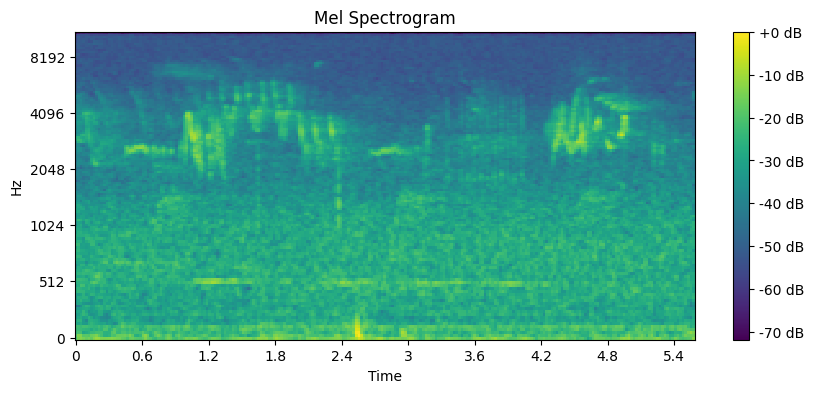

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Change this to one of your actual audio file paths
#audio_file = "E:/MIniproject sem 6/xeno canto dataset/all/A-Z/aldfly/XC133197.mp4"
audio_file = "E:/MIniproject sem 6/xeno canto dataset/all/A-Z/aldfly/XC16965.mp3"

try:
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=22050)
    print(f"✅ Successfully loaded: {audio_file}")
    print(f"Audio Shape: {y.shape}, Sample Rate: {sr}")

    # Extract Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    print(f"Mel Spectrogram Shape: {mel_spec.shape}")

    # Show spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel Spectrogram")
    plt.show()

except Exception as e:
    print(f"❌ ERROR: {e}")


In [15]:
import os
import numpy as np
import librosa

# Paths
audio_file = "E:/MIniproject sem 6/xeno canto dataset/all/A-Z/aldfly/XC16965.mp3"
output_path = "E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms"

# Load audio
y, sr = librosa.load(audio_file, sr=22050)

# Extract Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (better for ML models)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

# Create save directory
bird_class = "aldfly"  # Folder name for this bird
save_folder = os.path.join(output_path, bird_class)
os.makedirs(save_folder, exist_ok=True)

# Save file
save_path = os.path.join(save_folder, "test_spectrogram.npy")
np.save(save_path, mel_spec)

print(f"✅ Spectrogram saved at: {save_path}")


✅ Spectrogram saved at: E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms\aldfly\test_spectrogram.npy


Process All Audio Files
find mp4 files and extract ml spectograms 
and save them as .npy

In [16]:
import os
import numpy as np
import librosa
import glob

# Paths
dataset_path = "E:/MIniproject sem 6/xeno canto dataset/all/A-Z"
output_path = "E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms"

# Get all bird folders
bird_classes = os.listdir(dataset_path)

# Process each bird class
for bird in bird_classes:
    bird_folder = os.path.join(dataset_path, bird)
    
    # Check if it's a valid folder
    if not os.path.isdir(bird_folder):
        continue
    
    print(f"Processing bird class: {bird}")

    # Create output folder for this bird
    save_folder = os.path.join(output_path, bird)
    os.makedirs(save_folder, exist_ok=True)

    # Process all audio files in the bird folder
    audio_files = glob.glob(os.path.join(bird_folder, "*.mp3"))  # Adjust to "*.mp4" if needed

    for audio_file in audio_files:
        try:
            # Load audio
            y, sr = librosa.load(audio_file, sr=22050)

            # Extract Mel spectrogram
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            # Save as .npy file
            file_name = os.path.splitext(os.path.basename(audio_file))[0] + ".npy"
            save_path = os.path.join(save_folder, file_name)
            np.save(save_path, mel_spec)

        except Exception as e:
            print(f"Error processing {audio_file}: {e}")

print("✅ Processing complete!")


Processing bird class: aldfly
Processing bird class: ameavo
Processing bird class: amebit
Processing bird class: amecro
Processing bird class: amegfi
Processing bird class: amekes
Processing bird class: amepip
Processing bird class: amered
Processing bird class: amerob
Processing bird class: amewig
Processing bird class: amewoo
Processing bird class: amtspa
Processing bird class: annhum
Processing bird class: astfly
Processing bird class: baisan
Processing bird class: baleag
Processing bird class: balori
Processing bird class: banswa
Processing bird class: barswa
Processing bird class: bawwar
Processing bird class: belkin1
Processing bird class: belspa2
Processing bird class: bewwre
Processing bird class: bkbcuc
Processing bird class: bkbmag1
Processing bird class: bkbwar
Processing bird class: bkcchi
Processing bird class: bkchum
Processing bird class: bkhgro
Processing bird class: bkpwar
Processing bird class: bktspa
Processing bird class: blkpho
Processing bird class: blugrb1
Proces

C:\Users\Soham\AppData\Local\Temp\ipykernel_16812\237858756.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=22050)
C:\Users\Soham\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processing bird class: brnthr
Processing bird class: brthum
Processing bird class: brwhaw
Processing bird class: btbwar
Processing bird class: btnwar
Processing bird class: btywar
Processing bird class: buffle
Processing bird class: buggna
Processing bird class: buhvir
Processing bird class: bulori
Processing bird class: bushti
Processing bird class: buwwar
Processing bird class: cacwre
Processing bird class: calgul
Processing bird class: calqua
Processing bird class: camwar
Processing bird class: cangoo
Processing bird class: canwar
Processing bird class: canwre
Processing bird class: carwre
Processing bird class: casfin
Processing bird class: caster1
Processing bird class: casvir
Processing bird class: cedwax
Processing bird class: chispa
Processing bird class: chiswi
Processing bird class: chswar
Processing bird class: chukar
Processing bird class: clanut
Processing bird class: cliswa
Processing bird class: comgol
Processing bird class: comgra
Processing bird class: comloo
Processin

In [17]:
import glob

npy_files = glob.glob(os.path.join(output_path, "**", "*.npy"), recursive=True)

print(f"Total .npy files found: {len(npy_files)}")
print(npy_files[:5])  # Show first few saved files

Total .npy files found: 23785
['E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms\\aldfly\\test_spectrogram.npy', 'E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms\\aldfly\\XC133197.npy', 'E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms\\aldfly\\XC134024.npy', 'E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms\\aldfly\\XC134932.npy', 'E:/MIniproject sem 6/xeno canto dataset/processed_spectrograms\\aldfly\\XC135458.npy']


Now training the model 

In [1]:
#not required as repeaeted already done
"""
Feature Extraction: Convert Bird Audio WAV files into Mel Spectrograms

Purpose:
- Extract Mel Spectrogram features from bird audio recordings.
- Normalize, trim, and pad audio to a fixed duration (5 sec).
- Save extracted features as .npy files for efficient model training.

Reason:
Mel Spectrograms are effective for analyzing bird sounds as they capture frequency and time variations,
making them suitable for CNN-based classification.
"""

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress tracking

# Define dataset and output paths (Modify as per your directory)
dataset_path = "E:\\MIniproject sem 6\\xeno canto dataset\\all\\A-Z"
output_path = "E:\\MIniproject sem 6\\xeno canto dataset\\features"

# Ensure output directory exists
os.makedirs(output_path, exist_ok=True)

def extract_features(file_path, sr=22050, n_mels=128, duration=5):
    """
    Extracts a Mel Spectrogram from an audio file.
    
    - Converts audio to mono and sets a fixed sample rate.
    - Trims silence and normalizes the length (5 seconds).
    - Computes a Mel Spectrogram and converts it to dB scale.

    Returns:
    - mel_spec_db: A normalized spectrogram (dB scale).
    """
    try:
        # Load audio file with a fixed sample rate
        y, sr = librosa.load(file_path, sr=sr, mono=True)

        # Trim silence to remove unnecessary gaps
        y, _ = librosa.effects.trim(y)

        # Ensure all audio samples are of fixed duration (pad or truncate to 5 sec)
        max_length = sr * duration
        if len(y) < max_length:
            y = np.pad(y, (0, max_length - len(y)))  # Pad with zeros
        else:
            y = y[:max_length]  # Truncate if longer

        # Compute Mel Spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale

        return mel_spec_db

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Loop through all bird species folders and process audio files
for bird_class in tqdm(os.listdir(dataset_path)):
    bird_folder = os.path.join(dataset_path, bird_class)

    if os.path.isdir(bird_folder):  # Check if it's a folder
        print(f"\nProcessing bird class: {bird_class}")
        
        # Create a folder to save extracted features for this species
        class_output_path = os.path.join(output_path, bird_class)
        os.makedirs(class_output_path, exist_ok=True)

        # Process each WAV file in the species folder
        for file in os.listdir(bird_folder):
            if file.endswith(".wav"):  # Ensure we only process WAV files
                file_path = os.path.join(bird_folder, file)
                
                # Extract Mel Spectrogram features
                feature = extract_features(file_path)

                if feature is not None:
                    # Save extracted features as .npy (numpy array format)
                    save_path = os.path.join(class_output_path, file.replace(".wav", ".npy"))
                    np.save(save_path, feature)
                    print(f"Saved features: {save_path}")


  0%|▎                                                                                 | 1/259 [00:00<00:36,  7.05it/s]


Processing bird class: aldfly

Processing bird class: ameavo

Processing bird class: amebit


  2%|█▌                                                                                | 5/259 [00:00<00:14, 17.17it/s]


Processing bird class: amecro

Processing bird class: amegfi

Processing bird class: amekes

Processing bird class: amepip


  3%|██▌                                                                               | 8/259 [00:00<00:15, 15.88it/s]


Processing bird class: amered

Processing bird class: amerob


  5%|███▊                                                                             | 12/259 [00:00<00:19, 12.52it/s]


Processing bird class: amewig

Processing bird class: amewoo

Processing bird class: amtspa


  5%|████▍                                                                            | 14/259 [00:01<00:20, 11.93it/s]


Processing bird class: annhum

Processing bird class: astfly

Processing bird class: baisan


  7%|█████▋                                                                           | 18/259 [00:01<00:17, 13.73it/s]


Processing bird class: baleag

Processing bird class: balori

Processing bird class: banswa

Processing bird class: barswa


  8%|██████▎                                                                          | 20/259 [00:01<00:22, 10.72it/s]


Processing bird class: bawwar

Processing bird class: belkin1

Processing bird class: belspa2


  9%|███████▌                                                                         | 24/259 [00:02<00:21, 10.69it/s]


Processing bird class: bewwre

Processing bird class: bkbcuc


 10%|████████▏                                                                        | 26/259 [00:02<00:19, 12.14it/s]


Processing bird class: bkbmag1

Processing bird class: bkbwar

Processing bird class: bkcchi


 12%|█████████▍                                                                       | 30/259 [00:02<00:17, 12.90it/s]


Processing bird class: bkchum

Processing bird class: bkhgro

Processing bird class: bkpwar

Processing bird class: bktspa

Processing bird class: blkpho


 13%|██████████▎                                                                      | 33/259 [00:02<00:13, 16.15it/s]


Processing bird class: blugrb1

Processing bird class: blujay


 14%|███████████▌                                                                     | 37/259 [00:02<00:16, 13.78it/s]


Processing bird class: bnhcow

Processing bird class: boboli

Processing bird class: bongul

Processing bird class: brdowl

Processing bird class: brebla


 16%|█████████████▏                                                                   | 42/259 [00:03<00:14, 15.27it/s]


Processing bird class: brespa

Processing bird class: brncre

Processing bird class: brnthr


 18%|██████████████▍                                                                  | 46/259 [00:03<00:11, 19.33it/s]


Processing bird class: brthum

Processing bird class: brwhaw

Processing bird class: btbwar

Processing bird class: btnwar

Processing bird class: btywar

Processing bird class: buffle

Processing bird class: buggna


 20%|████████████████▎                                                                | 52/259 [00:03<00:12, 17.04it/s]


Processing bird class: buhvir

Processing bird class: bulori

Processing bird class: bushti


 21%|█████████████████▏                                                               | 55/259 [00:03<00:10, 19.64it/s]


Processing bird class: buwwar

Processing bird class: cacwre

Processing bird class: calgul

Processing bird class: calqua

Processing bird class: camwar

Processing bird class: cangoo


 22%|██████████████████▏                                                              | 58/259 [00:03<00:09, 20.83it/s]


Processing bird class: canwar

Processing bird class: canwre

Processing bird class: carwre


 24%|███████████████████▋                                                             | 63/259 [00:04<00:13, 14.79it/s]


Processing bird class: casfin

Processing bird class: caster1

Processing bird class: casvir


 25%|████████████████████▎                                                            | 65/259 [00:04<00:12, 15.23it/s]


Processing bird class: cedwax

Processing bird class: chispa

Processing bird class: chiswi


 27%|█████████████████████▉                                                           | 70/259 [00:04<00:11, 17.13it/s]


Processing bird class: chswar

Processing bird class: chukar

Processing bird class: clanut

Processing bird class: cliswa

Processing bird class: comgol


 29%|███████████████████████▍                                                         | 75/259 [00:05<00:10, 18.10it/s]


Processing bird class: comgra

Processing bird class: comloo

Processing bird class: commer

Processing bird class: comnig

Processing bird class: comrav


 30%|████████████████████████                                                         | 77/259 [00:05<00:12, 14.46it/s]


Processing bird class: comred

Processing bird class: comter


 31%|█████████████████████████▎                                                       | 81/259 [00:05<00:15, 11.53it/s]


Processing bird class: comyel

Processing bird class: coohaw

Processing bird class: coshum


 32%|█████████████████████████▉                                                       | 83/259 [00:06<00:20,  8.60it/s]


Processing bird class: cowscj1

Processing bird class: daejun

Processing bird class: dowwoo


 34%|███████████████████████████▌                                                     | 88/259 [00:06<00:13, 12.33it/s]


Processing bird class: dusfly

Processing bird class: eargre

Processing bird class: easblu

Processing bird class: easkin

Processing bird class: easmea


 36%|████████████████████████████▊                                                    | 92/259 [00:06<00:12, 13.41it/s]


Processing bird class: easpho

Processing bird class: eastow

Processing bird class: eawpew

Processing bird class: eucdov


 36%|█████████████████████████████▍                                                   | 94/259 [00:06<00:12, 13.12it/s]


Processing bird class: eursta


 37%|██████████████████████████████                                                   | 96/259 [00:07<00:16,  9.71it/s]


Processing bird class: evegro

Processing bird class: fiespa

Processing bird class: fiscro

Processing bird class: foxspa


 39%|███████████████████████████████▏                                                | 101/259 [00:07<00:12, 12.52it/s]


Processing bird class: gadwal

Processing bird class: gnttow

Processing bird class: gnwtea


 41%|████████████████████████████████▍                                               | 105/259 [00:07<00:11, 13.68it/s]


Processing bird class: gockin

Processing bird class: gocspa

Processing bird class: goleag

Processing bird class: grbher3

Processing bird class: grcfly


 42%|█████████████████████████████████▋                                              | 109/259 [00:07<00:10, 14.97it/s]


Processing bird class: greegr

Processing bird class: greroa

Processing bird class: greyel

Processing bird class: grhowl


 44%|██████████████████████████████████▉                                             | 113/259 [00:08<00:12, 11.53it/s]


Processing bird class: grnher

Processing bird class: grtgra

Processing bird class: grycat


 44%|███████████████████████████████████▌                                            | 115/259 [00:08<00:14,  9.80it/s]


Processing bird class: gryfly

Processing bird class: haiwoo

Processing bird class: hamfly


 45%|████████████████████████████████████▏                                           | 117/259 [00:08<00:13, 10.25it/s]


Processing bird class: hergul

Processing bird class: herthr


 47%|█████████████████████████████████████▎                                          | 121/259 [00:09<00:12, 11.30it/s]


Processing bird class: hoomer

Processing bird class: hoowar

Processing bird class: horlar

Processing bird class: houfin


 47%|█████████████████████████████████████▉                                          | 123/259 [00:09<00:15,  8.77it/s]


Processing bird class: houspa


 49%|██████████████████████████████████████▉                                         | 126/259 [00:10<00:20,  6.45it/s]


Processing bird class: houwre

Processing bird class: indbun

Processing bird class: juntit1

Processing bird class: killde

Processing bird class: labwoo


 52%|█████████████████████████████████████████▍                                      | 134/259 [00:10<00:07, 15.98it/s]


Processing bird class: larspa

Processing bird class: lazbun

Processing bird class: leabit

Processing bird class: leafly

Processing bird class: leasan

Processing bird class: lecthr

Processing bird class: lesgol


 53%|██████████████████████████████████████████▎                                     | 137/259 [00:10<00:07, 16.39it/s]


Processing bird class: lesnig

Processing bird class: lesyel

Processing bird class: lewwoo

Processing bird class: linspa


 56%|████████████████████████████████████████████▊                                   | 145/259 [00:10<00:05, 21.56it/s]


Processing bird class: lobcur

Processing bird class: lobdow

Processing bird class: logshr

Processing bird class: lotduc

Processing bird class: louwat

Processing bird class: macwar

Processing bird class: magwar

Processing bird class: mallar3


 57%|█████████████████████████████████████████████▋                                  | 148/259 [00:11<00:09, 12.02it/s]


Processing bird class: marwre


 58%|██████████████████████████████████████████████▎                                 | 150/259 [00:11<00:10, 10.31it/s]


Processing bird class: merlin

Processing bird class: moublu

Processing bird class: mouchi


 59%|██████████████████████████████████████████████▉                                 | 152/259 [00:11<00:09, 10.77it/s]


Processing bird class: moudov

Processing bird class: norcar


 60%|████████████████████████████████████████████████▏                               | 156/259 [00:12<00:09, 10.49it/s]


Processing bird class: norfli

Processing bird class: norhar2

Processing bird class: normoc

Processing bird class: norpar

Processing bird class: norpin

Processing bird class: norsho


 63%|██████████████████████████████████████████████████▎                             | 163/259 [00:12<00:04, 20.00it/s]


Processing bird class: norwat

Processing bird class: nrwswa

Processing bird class: nutwoo

Processing bird class: olsfly

Processing bird class: orcwar

Processing bird class: osprey


 65%|████████████████████████████████████████████████████▏                           | 169/259 [00:12<00:05, 16.96it/s]


Processing bird class: ovenbi1

Processing bird class: palwar

Processing bird class: pasfly


 66%|█████████████████████████████████████████████████████▏                          | 172/259 [00:12<00:04, 18.82it/s]


Processing bird class: pecsan

Processing bird class: perfal

Processing bird class: phaino

Processing bird class: pibgre

Processing bird class: pilwoo

Processing bird class: pingro

Processing bird class: pinjay


 70%|███████████████████████████████████████████████████████▉                        | 181/259 [00:13<00:03, 24.72it/s]


Processing bird class: pinsis

Processing bird class: pinwar

Processing bird class: plsvir

Processing bird class: prawar

Processing bird class: purfin

Processing bird class: pygnut

Processing bird class: rebmer


 71%|████████████████████████████████████████████████████████▊                       | 184/259 [00:13<00:03, 24.74it/s]


Processing bird class: rebnut

Processing bird class: rebsap

Processing bird class: rebwoo

Processing bird class: redcro


 73%|██████████████████████████████████████████████████████████▋                     | 190/259 [00:14<00:04, 14.50it/s]


Processing bird class: reevir1

Processing bird class: renpha

Processing bird class: reshaw

Processing bird class: rethaw

Processing bird class: rewbla


 75%|███████████████████████████████████████████████████████████▌                    | 193/259 [00:14<00:04, 13.43it/s]


Processing bird class: ribgul

Processing bird class: rinduc

Processing bird class: robgro

Processing bird class: rocpig

Processing bird class: rocwre

Processing bird class: rthhum

Processing bird class: ruckin


 79%|███████████████████████████████████████████████████████████████▎                | 205/259 [00:14<00:02, 23.78it/s]


Processing bird class: rudduc

Processing bird class: rufgro

Processing bird class: rufhum

Processing bird class: rusbla

Processing bird class: sagspa1

Processing bird class: sagthr

Processing bird class: savspa


 81%|████████████████████████████████████████████████████████████████▌               | 209/259 [00:14<00:02, 21.22it/s]


Processing bird class: saypho

Processing bird class: scatan

Processing bird class: scoori

Processing bird class: semplo

Processing bird class: semsan

Processing bird class: sheowl


 82%|█████████████████████████████████████████████████████████████████▍              | 212/259 [00:14<00:02, 22.59it/s]


Processing bird class: shshaw

Processing bird class: snobun

Processing bird class: snogoo

Processing bird class: solsan

Processing bird class: sonspa


 84%|███████████████████████████████████████████████████████████████████             | 217/259 [00:15<00:02, 20.72it/s]


Processing bird class: sora

Processing bird class: sposan

Processing bird class: spotow


 86%|████████████████████████████████████████████████████████████████████▉           | 223/259 [00:15<00:02, 17.32it/s]


Processing bird class: stejay

Processing bird class: swahaw

Processing bird class: swaspa

Processing bird class: swathr


 87%|█████████████████████████████████████████████████████████████████████▊          | 226/259 [00:15<00:02, 16.42it/s]


Processing bird class: treswa

Processing bird class: truswa

Processing bird class: tuftit

Processing bird class: tunswa


 89%|███████████████████████████████████████████████████████████████████████         | 230/259 [00:16<00:01, 14.76it/s]


Processing bird class: veery

Processing bird class: vesspa

Processing bird class: vigswa

Processing bird class: warvir


 91%|████████████████████████████████████████████████████████████████████████▌       | 235/259 [00:16<00:01, 15.56it/s]


Processing bird class: wesblu

Processing bird class: wesgre

Processing bird class: weskin

Processing bird class: wesmea


 92%|█████████████████████████████████████████████████████████████████████████▊      | 239/259 [00:16<00:01, 14.41it/s]


Processing bird class: wessan

Processing bird class: westan

Processing bird class: wewpew

Processing bird class: whbnut


 93%|██████████████████████████████████████████████████████████████████████████▍     | 241/259 [00:17<00:01, 10.21it/s]


Processing bird class: whcspa

Processing bird class: whfibi

Processing bird class: whtspa

Processing bird class: whtswi


 95%|███████████████████████████████████████████████████████████████████████████▋    | 245/259 [00:17<00:01, 13.37it/s]


Processing bird class: wilfly

Processing bird class: wilsni1

Processing bird class: wiltur

Processing bird class: winwre3


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 250/259 [00:17<00:00, 14.77it/s]


Processing bird class: wlswar

Processing bird class: wooduc

Processing bird class: wooscj2

Processing bird class: woothr


100%|████████████████████████████████████████████████████████████████████████████████| 259/259 [00:18<00:00, 14.38it/s]


Processing bird class: y00475

Processing bird class: yebfly

Processing bird class: yebsap

Processing bird class: yehbla

Processing bird class: yelwar

Processing bird class: yerwar

Processing bird class: yetvir


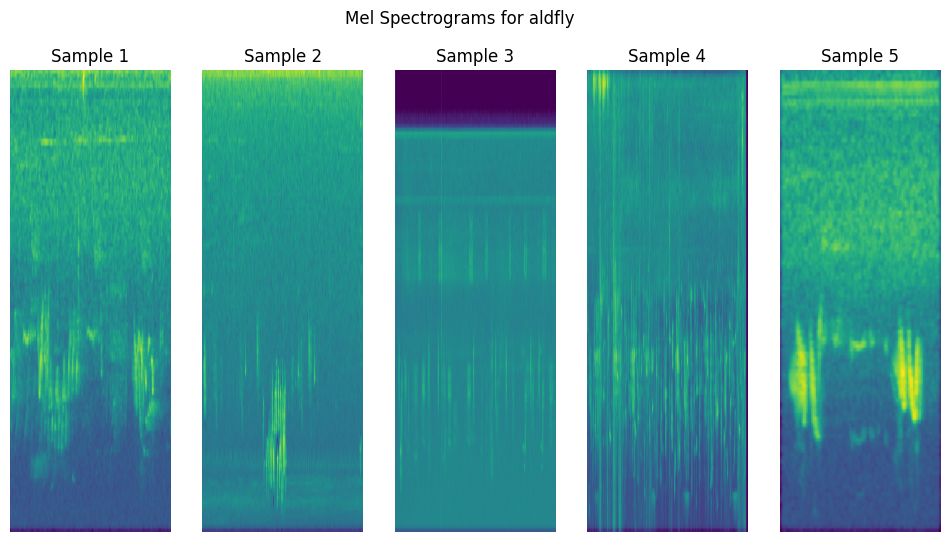

In [2]:
"""
Visualization: Display Mel Spectrograms of Bird Audio

Purpose:
- Load .npy spectrogram files from the processed dataset.
- Display them using matplotlib to ensure correct feature extraction.

Reason:
- Helps verify the structure of the data before training the model.
- Ensures the spectrograms correctly represent the bird sounds.
"""

import os
import numpy as np
import matplotlib.pyplot as plt

# Path to the processed spectrograms (Modify as needed)
processed_spectrograms_path = r"E:\MIniproject sem 6\xeno canto dataset\processed_spectrograms"

# Select a random bird species folder
bird_species = "aldfly"  # Change this to visualize other species
species_path = os.path.join(processed_spectrograms_path, bird_species)

# Get a list of spectrogram .npy files
spectrogram_files = [f for f in os.listdir(species_path) if f.endswith(".npy")]

# Load and display a few spectrograms
num_samples = min(5, len(spectrogram_files))  # Show up to 5 samples

plt.figure(figsize=(12, 6))

for i in range(num_samples):
    file_path = os.path.join(species_path, spectrogram_files[i])
    spectrogram = np.load(file_path)  # Load the spectrogram
    
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(spectrogram, cmap="viridis", aspect="auto")
    plt.title(f"Sample {i+1}")
    plt.axis("off")  # Hide axes for better visualization

plt.suptitle(f"Mel Spectrograms for {bird_species}")
plt.show()


In [3]:
"""
Dataset Preparation: Splitting Processed Spectrograms into Train, Validation, and Test Sets

Purpose:
- Organize the dataset into training, validation, and testing sets.
- Assign numerical labels to bird species for model training.
- Load spectrograms and labels into structured arrays for training.

Reason:
- Ensures a balanced dataset for proper model generalization.
- Helps the model learn effectively without overfitting.
"""

import os
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Define paths (Modify as per your dataset location)
processed_spectrograms_path = r"E:\MIniproject sem 6\xeno canto dataset\processed_spectrograms"

# Parameters
test_size = 0.2  # 20% of data for testing
val_size = 0.1   # 10% of remaining data for validation

# List all bird species (folders inside processed_spectrograms)
bird_species_list = sorted(os.listdir(processed_spectrograms_path))
num_classes = len(bird_species_list)  # Total bird species

# Creating label dictionary (assigning a number to each species)
species_to_label = {species: idx for idx, species in enumerate(bird_species_list)}

# Lists to store spectrogram data and labels
X = []  # Spectrograms
y = []  # Labels

# Load spectrograms and labels
for species in bird_species_list:
    species_path = os.path.join(processed_spectrograms_path, species)
    label = species_to_label[species]

    for file in os.listdir(species_path):
        if file.endswith(".npy"):  # Ensure it's a spectrogram file
            file_path = os.path.join(species_path, file)
            spectrogram = np.load(file_path)

            X.append(spectrogram)
            y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)  # Shape: (num_samples, height, width)
y = np.array(y)  # Shape: (num_samples,)

# Splitting data into Train (70%), Validation (10%), and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, stratify=y_train, random_state=42)

# Print dataset sizes
print(f"Training Set: {len(X_train)} samples")
print(f"Validation Set: {len(X_val)} samples")
print(f"Testing Set: {len(X_test)} samples")

# Save split datasets for quick access
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("species_to_label.npy", species_to_label)

print("Dataset successfully prepared and saved!")


MemoryError: Unable to allocate 2.46 MiB for an array with shape (645376,) and data type float32

In [5]:
from collections import Counter
from sklearn.model_selection import train_test_split

# Function to filter out classes with only 1 sample
def filter_rare_classes(file_paths, labels):
    class_counts = Counter(labels)  # Count occurrences of each class
    filtered_paths = []
    filtered_labels = []
    
    for path, label in zip(file_paths, labels):
        if class_counts[label] > 1:  # Keep only classes with at least 2 samples
            filtered_paths.append(path)
            filtered_labels.append(label)
    
    return filtered_paths, filtered_labels

# Get file paths and labels
file_paths, labels = get_file_paths_and_labels()

# Filter rare classes
file_paths, labels = filter_rare_classes(file_paths, labels)

# Split dataset (Train: 70%, Validation: 10%, Test: 20%)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    file_paths, labels, test_size=0.2, stratify=labels, random_state=42
)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.125, stratify=train_labels, random_state=42
)  # 10% validation (0.125 * 80% = 10%)


In [8]:
import numpy as np

# Function to load spectrograms in a memory-efficient way
def load_spectrograms_lazy(file_paths):
    spectrograms = []
    for path in file_paths:
        spectrogram = np.load(path, mmap_mode='r')  # Load using memory mapping (doesn't fully load into RAM)
        spectrograms.append(spectrogram)
    return spectrograms  # Keeps a reference instead of loading all into memory

# Load spectrograms lazily
X_train = load_spectrograms_lazy(train_paths)
X_val = load_spectrograms_lazy(val_paths)
X_test = load_spectrograms_lazy(test_paths)

# Convert labels to NumPy arrays
y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)


In [10]:
# Check dataset shapes
print("Train Data:", len(X_train), "samples")
print("Validation Data:", len(X_val), "samples")
print("Test Data:", len(X_test), "samples")

print("Train Labels:", y_train.shape)
print("Validation Labels:", y_val.shape)
print("Test Labels:", y_test.shape)


Train Data: 16642 samples
Validation Data: 2378 samples
Test Data: 4756 samples
Train Labels: (16642,)
Validation Labels: (2378,)
Test Labels: (4756,)


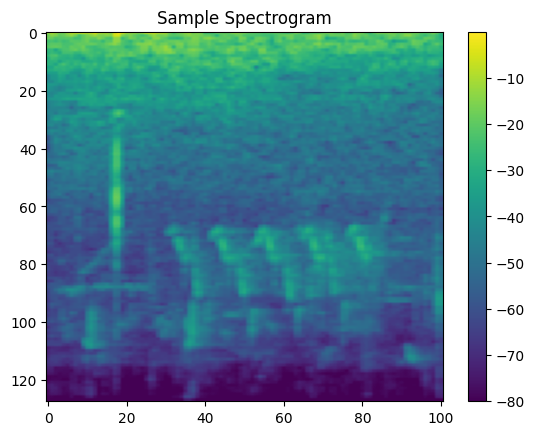

In [11]:
import matplotlib.pyplot as plt

# Load one sample fully into memory for visualization
sample_spectrogram = np.load(train_paths[0])  # Load the first spectrogram

# Plot it
plt.imshow(sample_spectrogram, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Sample Spectrogram")
plt.show()


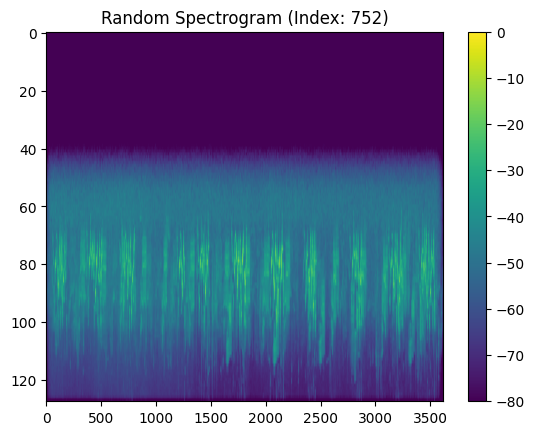

In [15]:
import random

# Select a random spectrogram
random_index = random.randint(0, len(train_paths) - 1)
random_spectrogram = np.load(train_paths[random_index])

# Plot the random spectrogram
plt.imshow(random_spectrogram, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title(f"Random Spectrogram (Index: {random_index})")
plt.show()


In [ ]:
#converting spectograms to tensors 
import tensorflow as tf

# Convert to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train)
X_val_tf = tf.convert_to_tensor(X_val)
X_test_tf = tf.convert_to_tensor(X_test)

y_train_tf = tf.convert_to_tensor(y_train)
y_val_tf = tf.convert_to_tensor(y_val)
y_test_tf = tf.convert_to_tensor(y_test)
